In [1]:
import pandas as pd
from pandas import Series
import matplotlib
from matplotlib import pyplot as plt

In [2]:
pd.set_option('display.min_rows', 20)
deadlines = ['09/23/2020','10/07/2020','10/19/2020','10/30/2020','11/11/2020','11/25/2020','12/09/2020','12/15/2020']
days_left = []
table = pd.read_csv('officehours.csv', delimiter=',', error_bad_lines=False)
table
for idx,line in table.iterrows():
    date = line['First join'].split()[0]
    month = int(date.split('/')[0])
    day = int(date.split('/')[1])
    #bull = False
    for dd in deadlines:
        if month < int(dd.split('/')[0]):
            days = (30-day) + int(dd.split('/')[1])
            days_left.append(days)
            #bull = True
            break
        elif month == int(dd.split('/')[0]) and day <= int(dd.split('/')[1]):
            days = int(dd.split('/')[1]) - day
            days_left.append(days)
            #bull = True
            break
        ##########   
        # This one considers projects n days after the deadline!
        ##########
        elif month == int(dd.split('/')[0]) and (day - int(dd.split('/')[1])) < 4:
            days_left.append(int(dd.split('/')[1])-day)
            #bull = True
            break
        elif month == int(dd.split('/')[0])+1 and (day + 30 - int(dd.split('/')[1])) < 4:
            days_left.append(-1*(day + 30 - int(dd.split('/')[1])))
            break
        
        elif month == 12 and day == 20:
            days_left.append(-5)
            #bull = True
            break
        
    #if (not bull):
    #    print(idx, date)
    
table['Days before deadline'] = days_left
table

,Staff,Name,Role,First join,Last leave,Total time,Joins,Days before deadline
0,emma,105456dda9bb7203ccd31b4ad204cc45,Presenter,10/12/2020 12:50:58,10/12/2020 14:18:20,01:27:21,1,7
1,emma,60766eb69bd63f59b909b043a08520e5,Presenter,10/12/2020 12:58:48,10/12/2020 14:15:05,01:15:31,2,7
2,emma,ce0843389ec1c430b99d738e541a844b,Presenter,10/12/2020 12:59:01,10/12/2020 14:15:24,01:16:18,2,7
3,emma,fc334a2dfd5140be060893a9c6afcfdf,Presenter,10/12/2020 13:00:40,10/12/2020 14:08:17,01:07:36,1,7
4,emma,a837010ec752cdf650d641700901f64e,Presenter,10/12/2020 13:01:26,10/12/2020 14:17:21,01:11:27,2,7
5,emma,76eeb062f173cf87f5f99df79ebdb759,Presenter,10/12/2020 13:01:29,10/12/2020 14:18:21,01:16:51,1,7
6,emma,EMMA BROSTROM,Moderator,10/12/2020 13:10:40,10/12/2020 14:00:55,00:50:15,1,7
7,emma,3eea16480b4572d2331c890ac34593c6,Presenter,10/12/2020 14:57:02,10/12/2020 15:53:43,00:56:41,1,7
8,emma,df1f590c832ed558acb1b4d17dda4b5b,Presenter,10/12/2020 14:57:17,10/12/2020 15:53:50,00:56:33,1,7
9,emma,9314207a9cbe7578f1d663decd0734f4,Presenter,10/12/2020 14:57:24,10/12/2020 15:54:08,00:56:44,1,7


In [3]:
presenter_table = table[table['Role'] == 'Presenter']
mod_table = table[table['Role'] == 'Moderator']

def get_ax(size=(3,3), font=18):
    matplotlib.rcParams["font.size"] = font
    fig, ax = plt.subplots(figsize=size)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    return ax

def convert_time(time):
    hr = time.split(':')[0]
    mins = time.split(':')[1]
    total_mins = int(mins) + (int(hr)*60)
    return total_mins/60
mod_table

,Staff,Name,Role,First join,Last leave,Total time,Joins,Days before deadline
6,emma,EMMA BROSTROM,Moderator,10/12/2020 13:10:40,10/12/2020 14:00:55,00:50:15,1,7
11,emma,EMMA BROSTROM,Moderator,10/12/2020 15:09:54,10/12/2020 16:59:28,01:33:52,3,7
17,emma,EMMA BROSTROM,Moderator,10/13/2020 13:00:37,10/13/2020 14:57:59,01:57:22,1,6
23,emma,EMMA BROSTROM,Moderator,10/14/2020 12:09:19,10/14/2020 13:54:28,01:31:56,2,5
32,emma,EMMA BROSTROM,Moderator,10/19/2020 15:11:20,10/19/2020 16:26:14,01:02:06,2,0
41,emma,EMMA BROSTROM,Moderator,10/19/2020 13:10:24,10/19/2020 13:48:50,00:35:24,3,0
48,emma,EMMA BROSTROM,Moderator,10/20/2020 12:59:22,10/20/2020 14:58:03,01:58:40,1,-1
56,emma,EMMA BROSTROM,Moderator,10/21/2020 12:09:54,10/21/2020 13:49:57,01:28:40,2,-2
67,emma,EMMA BROSTROM,Moderator,10/26/2020 13:09:58,10/26/2020 13:59:56,00:49:57,1,4
73,emma,EMMA BROSTROM,Moderator,10/26/2020 15:09:40,10/26/2020 16:30:35,01:07:09,2,4


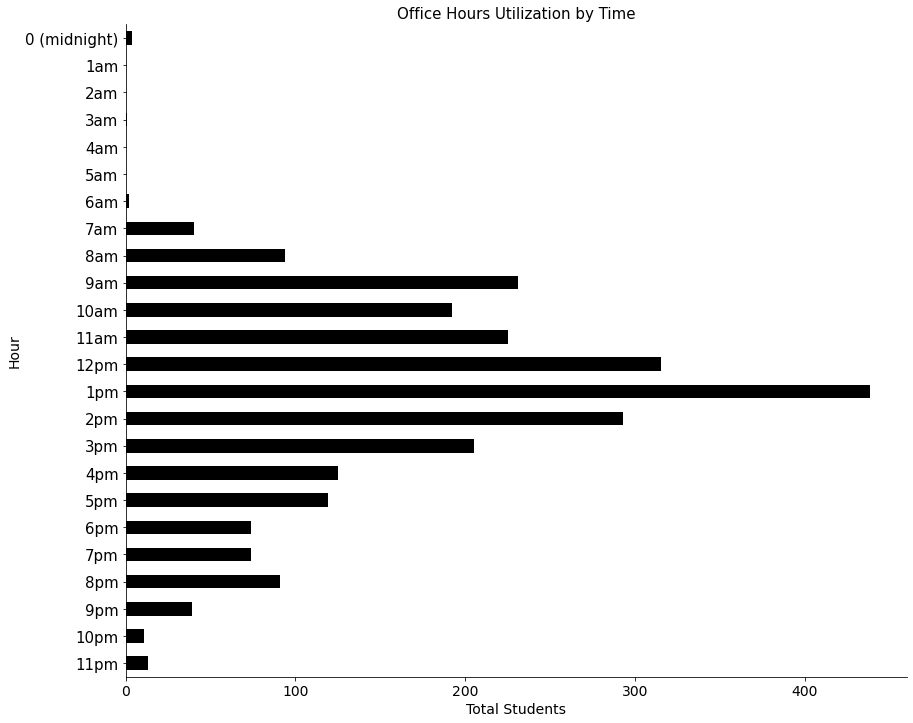

In [4]:
# 1: Display time attendance by table
def time_chart(chart=table, both='false'):
    date_dict = {}
    time_dict = {0:0,1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0,10:0,11:0,12:0,13:0,14:0,15:0,16:0,17:0,18:0,19:0,20:0,21:0,22:0,23:0}
    staff_time_dict = {}
    stud_time_dict = {}
    for line in chart['First join']:

        date = line.split()[0]
        time = line.split()[1]
        hour = time.split(':')[0]
        if date not in date_dict:
            date_dict[date] = 1
        else:
            date_dict[date] += 1

        time_dict[int(hour)] += 1


    time_val = []
    for num in sorted(time_dict):
        time_val.append(time_dict[num])
    headers = sorted(time_dict)
    headers.reverse()
    time_val.reverse()

    for idx,val in enumerate(headers):
        if val==0:
            headers[idx] = str(val)+' (midnight)'
        elif val < 12:
            headers[idx] = str(val)+'am'
        elif val==12:
            headers[idx] = str(val)+'pm'
        else:
            headers[idx] = str(val-12)+'pm'
    xlabel = "Total Students and Moderators"
    if (chart.equals(mod_table)):
        xlabel = 'Total Moderators'
    if (chart.equals(presenter_table)):
        xlabel = 'Total Students'

    ax = get_ax(size=(14,12), font=14)
    ax = Series(time_val).plot.barh(ax=ax, color="0")
    ax.set_title('Office Hours Utilization by Time', fontsize=15)
    ax.set_xlabel(xlabel)
    ax.set_ylabel("Hour")
    ax.set_yticklabels(headers, fontsize=15)
    return ax


time_chart(presenter_table)

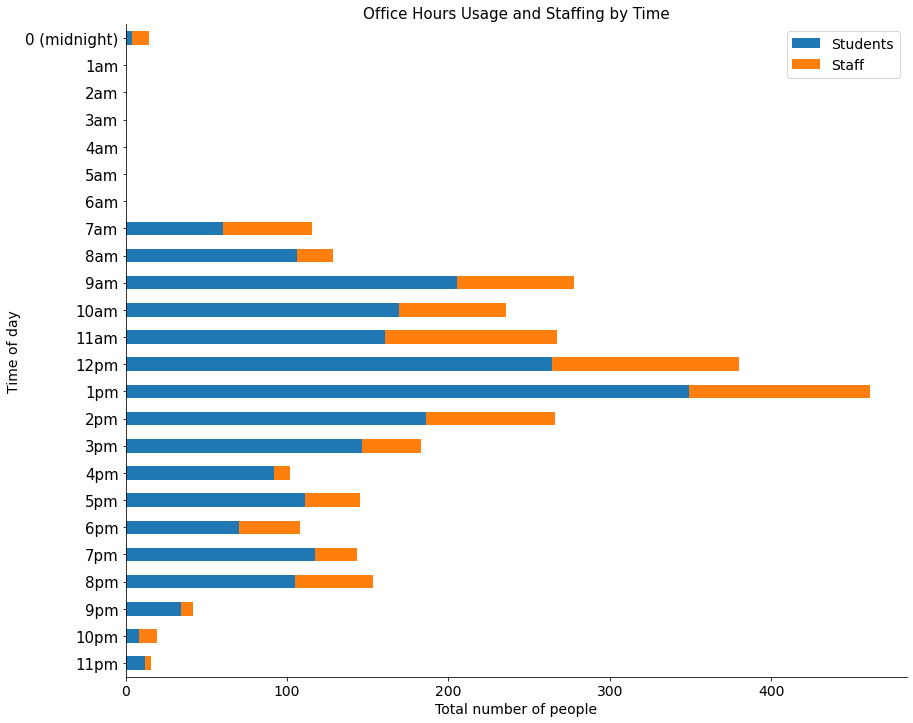

In [5]:
# 2: Utilization by Time (both students and mods)
date_dict = {}
staff_dict = {0:0,1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0,10:0,11:0,12:0,13:0,14:0,15:0,16:0,17:0,18:0,19:0,20:0,21:0,22:0,23:0}
stud_dict = {0:0,1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0,10:0,11:0,12:0,13:0,14:0,15:0,16:0,17:0,18:0,19:0,20:0,21:0,22:0,23:0}
for idx,line in table.iterrows():
    date = line['First join'].split()[0]
    time = line['First join'].split()[1]
    hour = time.split(':')[0]
    spent = convert_time(line['Total time'])
    if date not in date_dict:
        date_dict[date] = 1
    else:
        date_dict[date] += 1

    ########
    # add variable "spent" for total hours, or just append 1 for total people
    ########  
    if line['Role']=='Presenter':
        stud_dict[int(hour)] += spent
    else:
        staff_dict[int(hour)] += spent


stud_val = []
for num in sorted(stud_dict):
    stud_val.append(stud_dict[num])
mod_val = []
for num in sorted(staff_dict):
    mod_val.append(staff_dict[num])
headers = sorted(stud_dict)
headers.reverse()
stud_val.reverse()
mod_val.reverse()

for idx,val in enumerate(headers):
    if val==0:
        headers[idx] = str(val)+' (midnight)'
    elif val < 12:
        headers[idx] = str(val)+'am'
    elif val==12:
        headers[idx] = str(val)+'pm'
    else:
        headers[idx] = str(val-12)+'pm'
dfplt = pd.DataFrame({
    'Students': stud_val,
    'Staff': mod_val
},index=headers)
        
        

ax = get_ax(size=(14,12), font=14)
ax = dfplt.plot.barh(stacked=True, ax=ax)
ax.set_title('Office Hours Usage and Staffing by Time', fontsize=15)
ax.set_xlabel('Total number of people')
ax.set_ylabel("Time of day")
ax.set_yticklabels(headers, fontsize=15)
plt.show()

[8.35, -2.5500000000000007, 26.983333333333338, 56.399999999999956, 91.63333333333333, 32.300000000000004, 77.46666666666664, 82.19999999999997, 110.51666666666668, 105.6500000000002, 236.81666666666658, 148.3, 53.933333333333366, 103.21666666666668, 133.28333333333313, 84.13333333333331, 5.38333333333334, 0.5, 0, 0.0, -0.06666666666666667, 0, 0, -6.5166666666666675]


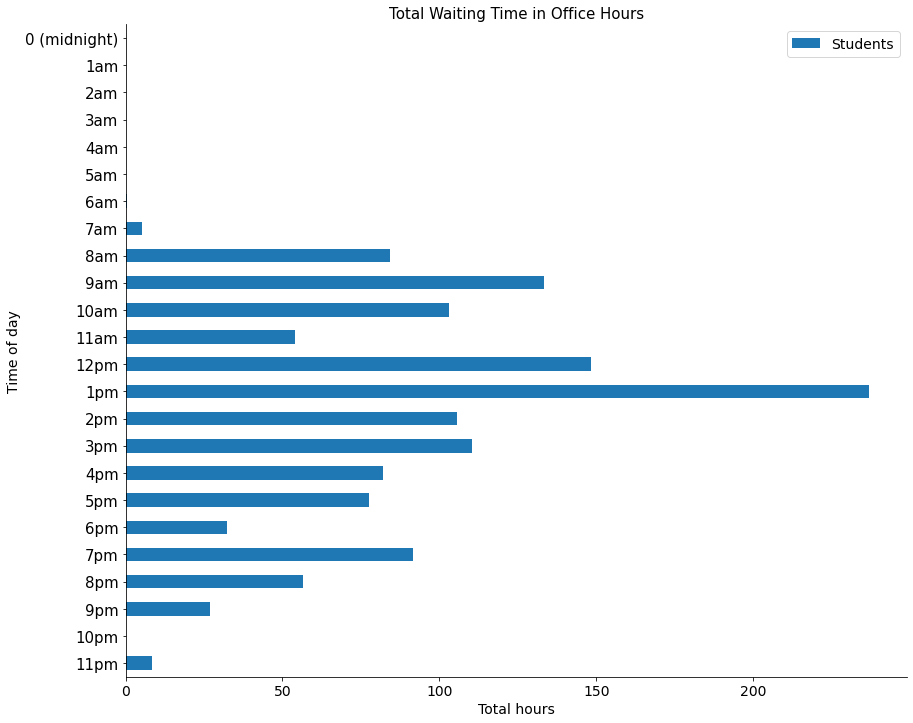

In [6]:
# 3: Total waiting time during time of day
wait_list = []
for idx,val in enumerate(stud_val):
    wait_list.append(stud_val[idx]-mod_val[idx])
print(wait_list)
dfplt = pd.DataFrame({
    'Students': wait_list
},index=headers)
        
        

ax = get_ax(size=(14,12), font=14)
ax = dfplt.plot.barh(stacked=True, ax=ax)
ax.set_title('Total Waiting Time in Office Hours', fontsize=15)
ax.set_xlabel('Total hours')
ax.set_ylabel("Time of day")
ax.set_yticklabels(headers, fontsize=15)
ax.set_xlim(0)
plt.show()

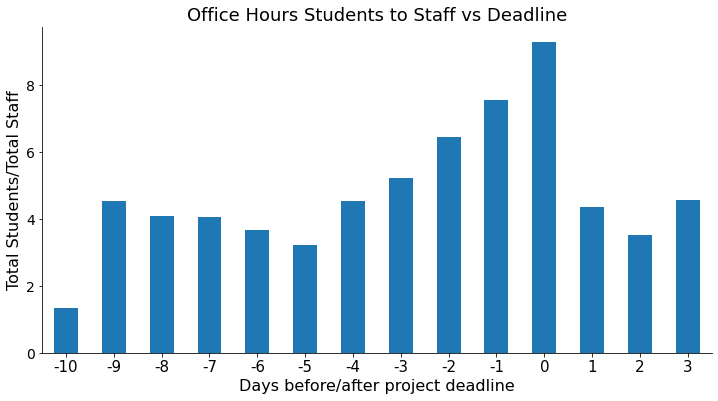

In [7]:
# Student-staff ratio vs number of days left before deadline
presenter_table
mod_table
presenter_people = {}
mod_people = {}
for idx,line in presenter_table.iterrows():
    days = line['Days before deadline']
    if days not in presenter_people:
        presenter_people[days] = 1
    else:
        presenter_people[days] += 1
for idx,line in mod_table.iterrows():
    days = line['Days before deadline']
    if days not in mod_people:
        mod_people[days] = 1
    else:
        mod_people[days] += 1

day_list = sorted(mod_people)
ratio_list = []
for day in day_list:
    if day in presenter_people and day in mod_people:
        ratio_list.append(presenter_people[day]/mod_people[day])
    else:
        ratio_list.append(-1)
day_list = day_list[0:-2]
day_list = [x * -1 for x in day_list]
ratio_list = ratio_list[0:-2]
#for idx,day in enumerate(day_list):
#    if day<0:
#        day_list[idx] = str(-1*day)+' day(s) after'
#    if day==0:
#        day_list[idx] = 'Day of Deadline'
#    if day>0:
#        day_list[idx] = str(day)+' day(s) before'

ratio_list.reverse()
day_list.reverse()
ax = get_ax(size=(12,6), font=14)
ax = Series(ratio_list[8:]).plot.bar(ax=ax)
ax.set_title('Office Hours Students to Staff vs Deadline', fontsize=18)
ax.set_ylabel('Total Students/Total Staff', fontsize=16)
ax.set_xlabel("Days before/after project deadline", fontsize=16)
ax.set_xticklabels(day_list[8:], fontsize=15, rotation=0)
plt.show()

In [8]:
pd.set_option('display.min_rows', 40)
date = '11/15/2020'
table[table['Days before deadline'] == 10] #and presenter_table['First join'].split()[0]==date]
presenter_table['First join']

0       10/12/2020 12:50:58
1       10/12/2020 12:58:48
2       10/12/2020 12:59:01
3       10/12/2020 13:00:40
4       10/12/2020 13:01:26
5       10/12/2020 13:01:29
7       10/12/2020 14:57:02
8       10/12/2020 14:57:17
9       10/12/2020 14:57:24
10      10/12/2020 15:02:41
12      10/12/2020 15:58:38
13      10/12/2020 15:59:37
14      10/12/2020 16:00:36
15      10/13/2020 12:48:42
16      10/13/2020 12:57:43
18      10/13/2020 13:09:51
19      10/13/2020 13:27:03
20      10/14/2020 11:57:57
21      10/14/2020 12:00:11
22      10/14/2020 12:03:14
               ...         
3084    09/29/2020 19:56:25
3085    09/29/2020 21:02:56
3086    09/29/2020 21:26:52
3087    09/29/2020 21:48:00
3089    09/30/2020 16:55:39
3090    09/30/2020 16:58:38
3091    09/30/2020 17:00:15
3092    09/30/2020 17:04:15
3094    09/30/2020 17:26:37
3095    09/30/2020 12:57:10
3096    09/30/2020 12:58:53
3098    09/30/2020 13:14:01
3099    09/30/2020 13:17:49
3100    09/30/2020 13:21:31
3102    09/30/2020 2

In [11]:
# calculate hourly ratio = avg number of students in an hour / avg number of staff members in an hour
# avg num of students in an hour = total students/total hours spent by students
# avg num of staff in an hour = total staff members/total hours spent by staff
presenter_table
mod_table
presenter_avg = {}
mod_avg = {}
day_list = [10,9,8,7,6,5,4,3,2,1,0,-1,-2,-3]
for day in day_list:
    num_mods = 0
    num_students = 0
    for idx,line in mod_table[mod_table['Days before deadline']==day].iterrows():
        num_mods += 1
        date = line['First join'].split()[0]
        time_join = line['First join'].split()[1]
        time_leave = line['Last leave'].split()[1]
        num_hours += convert_time(line['Total time'])
        
        for idx,line in presenter_table[presenter_table['Days before deadline']==day and presenter_table['First join'].split()[0]==date].iterrows():
        
    #### PROBLEM HERE! Hours overlap. Ex: in a 1 hr session, if there are 3 students
    # and 1 staff, ratio should be 3:1. But if all students enter at the start together
    # then there is waiting time, and the avg student/hr = 3/3 hrs = 1, which is wrong!


    #print('num hours: '+str(num_hours)+", from line: "+line['Total time'])
    #print(line)
            if num_hours == 0:
                print('error')
            else:
                presenter_avg[-1*day] = num_people/num_hours
    
#print(presenter_avg)
for day in day_list:
    num_people = 0
    num_hours = 0
    for idx,line in mod_table[mod_table['Days before deadline']==day].iterrows():
        num_people += 1
        num_hours += convert_time(line['Total time'])
    if num_hours == 0:
        print('error')
    else:
        mod_avg[-1*day] = num_people/num_hours
#print(mod_avg)
vals = []
header = []
for val in mod_avg:
    #print("days before deadline: "+str(val)+", ratio: "+str(presenter_avg[val]/mod_avg[val]))
    vals.append(presenter_avg[val]/mod_avg[val])
    header.append(val)
print(presenter_avg)
print(mod_avg)
print(vals)
print(header)

ax = get_ax(size=(12,6), font=14)
ax = Series(vals).plot.bar(ax=ax)
ax.set_title('Office Hours Student Ratio vs Deadline', fontsize=18)
ax.set_ylabel('Students to Staff Ratio', fontsize=16)
ax.set_xlabel("Days before/after project deadline", fontsize=16)
ax.set_xticklabels(header, fontsize=15, rotation=0)
plt.show()


NameError: name 'num_hours' is not defined

In [ ]:
day = 10
for idx,line in presenter_table[presenter_table['Days before deadline']==day].iterrows():
    print(line)